In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read the text

In [2]:
irdata = pd.read_excel('/content/iris (3).xls')

display the begining of the data set

In [3]:
irdata.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
irdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
irdata.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
irdata.shape

(150, 5)

In [8]:
irdata.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<Axes: xlabel='Classification'>

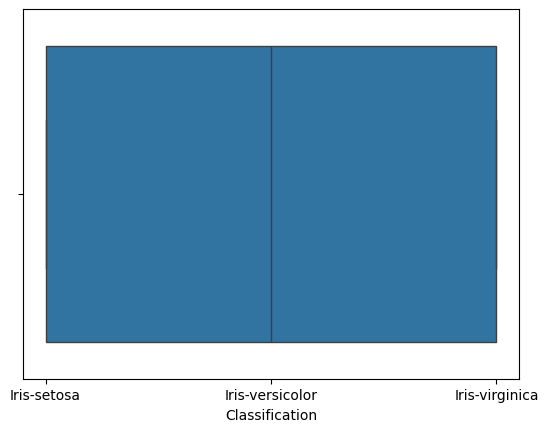

In [9]:
sns.boxplot(x=irdata['Classification'])

handling and detection of outlier

<Axes: xlabel='SW'>

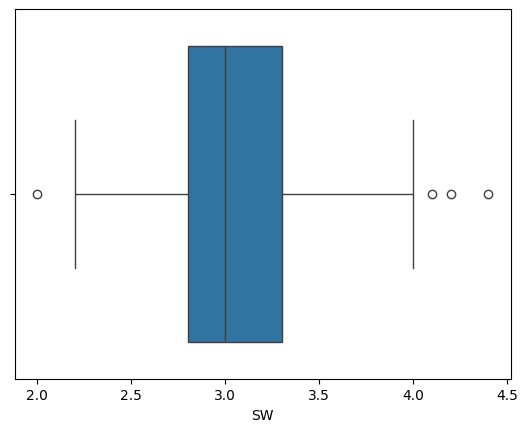

In [10]:
sns.boxplot(x=irdata['SW'])

In [11]:
q1 = irdata['SW'].quantile(0.25)
q3 = irdata['SW'].quantile(0.75)

iqr = q3 - q1
iqr

0.5

In [12]:
up_lim =  q3 + 1.5*iqr
low_lim = q1 - 1.5*iqr

In [13]:
def limit_imputer(value):
    if value>up_lim:
        return up_lim
    if value<low_lim:
        return low_lim
    else:
        return value

# using imputer function

In [14]:
irdata['SW'] = irdata['SW'].apply(limit_imputer)
irdata['SW'].describe()

count    144.000000
mean       3.045833
std        0.419519
min        2.050000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.050000
Name: SW, dtype: float64

<Axes: xlabel='SW'>

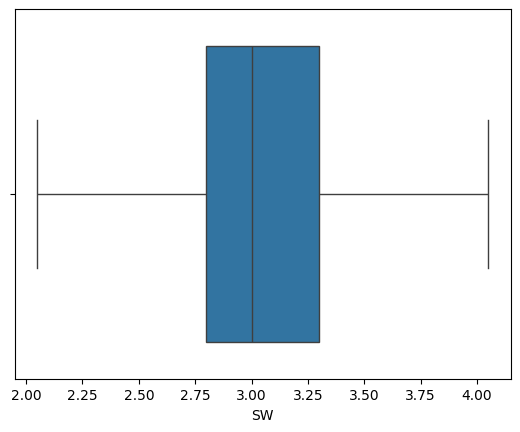

In [15]:
sns.boxplot(x = irdata['SW'])

In [16]:
irdata.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# handling null values

In [17]:

null_cols= ['SW','SL','PL']

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
irdata[null_cols] = imputer.fit_transform(irdata[null_cols])

In [19]:
irdata.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [20]:
y = irdata['Classification']
X = irdata.drop(['Classification'],axis=1)

In [21]:
y.shape

(150,)

In [23]:
X.shape

(150, 4)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# y needs reshaping into 2D array
y = y.reshape(-1,1)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Train Test splitting

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.20)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
ln_model = LinearRegression()
ln_model.fit(X_train,y_train)
y_predictions = ln_model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score
print("Mean Squared Error of the model is ",mean_squared_error(y_predictions,y_test))
print("Mean absolute Error of the model is ",mean_absolute_error(y_predictions,y_test))
print("R2 score of the model is ",r2_score(y_predictions,y_test))

Mean Squared Error of the model is  0.054060222803115246
Mean absolute Error of the model is  0.17210513130464913
R2 score of the model is  0.9474712933984258


# Logistic Regression

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ycat_train = le.fit_transform(y_train)
ycat_test = le.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [32]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,ycat_train)

ycat_pred =log_model.predict(X_test)
ycat_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [33]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score
print('Accuracy is', accuracy_score(ycat_test, ycat_pred))
print('Precision is', precision_score(ycat_test, ycat_pred,average='macro'))
print('Recall is', recall_score(ycat_test, ycat_pred,average='macro'))
print('F1 Score is', f1_score(ycat_test, ycat_pred,average='macro'))

Accuracy is 0.9666666666666667
Precision is 0.9722222222222222
Recall is 0.9629629629629629
F1 Score is 0.9658994032395567


In [34]:
confusion_matrix(ycat_test,ycat_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

# KNN Classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,ycat_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(ycat_test,y_pred)
    metric_k.append(acc)

metric_k

[1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667]

In [36]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,ycat_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(ycat_test,y_pred)
    metric_k.append(acc)

metric_k

[1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667]

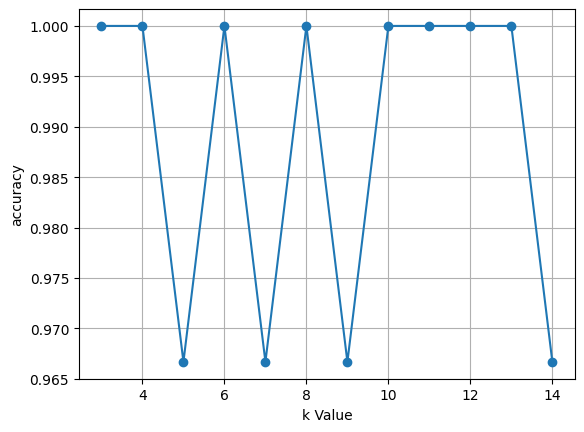

In [37]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [38]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,ycat_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(ycat_test, y_pred_knn))

Accuracy is 1.0


In [39]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski',p=1)
classifier.fit(X_train,ycat_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(ycat_test, y_pred_knn))

Accuracy is 1.0


# decision tree

In [40]:

from sklearn.tree import DecisionTreeClassifier
classidt = DecisionTreeClassifier(criterion='entropy')
classidt.fit(X_train,ycat_train)
y_pred_dt = classidt.predict(X_test)

In [41]:
print(confusion_matrix(ycat_test,y_pred_dt))
print("accuracy score",accuracy_score(ycat_test,y_pred_dt))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy score 1.0


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rtf =  RandomForestClassifier()
rtf.fit(X_train, ycat_train)
rtf_pred=rtf.predict(X_test)

In [43]:
print('Accuracy is', accuracy_score(ycat_test, rtf_pred))
confusion_matrix(ycat_test,rtf_pred)

Accuracy is 1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

# SVM

In [44]:
from sklearn.svm import SVC
svm_s = SVC(kernel ='linear')
svm_s.fit(X_train, ycat_train)
y_svm_pred = svm_s.predict(X_test)

In [45]:
print('Accuracy is', accuracy_score(ycat_test, y_svm_pred))
print('Precision is', precision_score(ycat_test, y_svm_pred, average='macro'))
confusion_matrix(ycat_test,y_svm_pred)

Accuracy is 0.9666666666666667
Precision is 0.9722222222222222


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [46]:
svm_s = SVC(kernel ='poly')
svm_s.fit(X_train, ycat_train)
y_svm_pred1 = svm_s.predict(X_test)

In [47]:
print('Accuracy is', accuracy_score(ycat_test, y_svm_pred1))

Accuracy is 0.9333333333333333


In [48]:
svm_s = SVC(kernel ='rbf')
svm_s.fit(X_train, ycat_train)
y_svm_pred2 = svm_s.predict(X_test)

In [49]:
print('Accuracy is', accuracy_score(ycat_test, y_svm_pred2))

Accuracy is 0.9666666666666667


# Random Forest, K-NN and Decision Tree have accuracy of 1.0